In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector

In [2]:
# connect mysql dengan param

mydb = mysql.connector.connect(
    host = "localhost",
    user = "root",
    passwd = "",
    database = "world"
)

q = "select * from country"
df = pd.read_sql(q, mydb)
df.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,José Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL


In [3]:
df.Region.unique()

array(['Caribbean', 'Southern and Central Asia', 'Central Africa',
       'Southern Europe', 'Middle East', 'South America', 'Polynesia',
       'Antarctica', 'Australia and New Zealand', 'Western Europe',
       'Eastern Africa', 'Western Africa', 'Eastern Europe',
       'Central America', 'North America', 'Southeast Asia',
       'Southern Africa', 'Eastern Asia', 'Nordic Countries',
       'Northern Africa', 'Baltic Countries', 'Melanesia', 'Micronesia',
       'British Islands', 'Micronesia/Caribbean'], dtype=object)

In [4]:
dfAsean = df[ df.Region == 'Southeast Asia']
dfAsean = dfAsean.sort_values('Name')
dfAsean.describe()

,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,Capital
count,1.100000e+01,10.000000,1.100000e+01,11.00000,11.000000,10.000000,11.000000
mean,4.086183e+05,1894.600000,4.714009e+07,64.40000,58422.090909,85908.800000,2133.545455
std,5.394099e+05,191.725035,6.261174e+07,10.27239,57378.680740,75787.796244,1099.945941
min,6.180000e+02,1350.000000,3.280000e+05,46.00000,0.000000,1746.000000,538.000000
25%,9.795450e+04,1945.250000,4.500000e+06,55.70000,8413.000000,15053.500000,1230.500000
50%,3.000000e+05,1950.500000,2.224400e+07,68.00000,65107.000000,89278.500000,2432.000000
75%,4.224020e+05,1956.000000,6.868300e+07,70.05000,85742.500000,139901.250000,2959.000000
max,1.904569e+06,1984.000000,2.121070e+08,80.10000,180375.000000,215002.000000,3770.000000


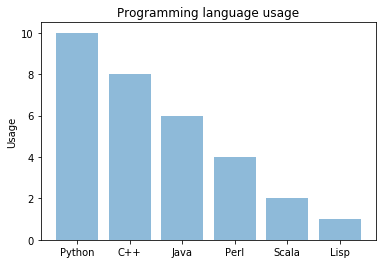

In [5]:
objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(objects))
performance = [10,8,6,4,2,1]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')

plt.show()

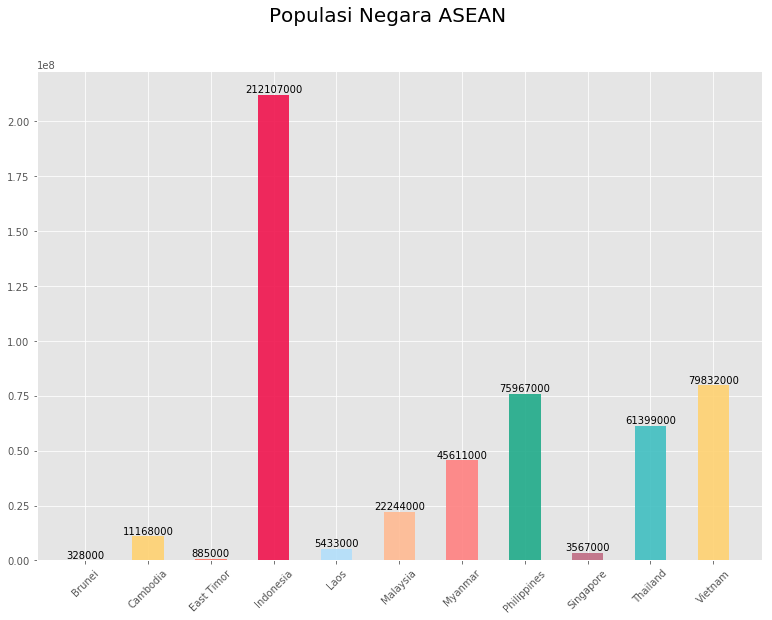

In [41]:
%matplotlib inline
x_index = np.arange(len(dfAsean.Population))
x_index_label = dfAsean.Name

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(13,9))

# fig.set_figheight(7)
# fig.set_figwidth(18)

aseanPlot = ax.bar(x_index, dfAsean.Population, width=.5,align='center', alpha=0.9, 
                    color=['#40bfc1', '#ffd271', '#ff6f5e', '#f0134d', '#b2dffb', '#ffba92', '#ff8080', '#1fab89', '#c06c84'])
plt.xticks(x_index, x_index_label, rotation='45')

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
#         print(height)
#         print(rect.get_x())
#         print(rect.get_width()/2.)
        
        plt.text(rect.get_x() + rect.get_width()-0.25, # posisi x
                     (height),                       # posisi y
                    (int(height)), ha="center" ,               # value
                 va='bottom') 
autolabel(aseanPlot)
plt.suptitle("Populasi Negara ASEAN", fontsize="20")

plt.show()

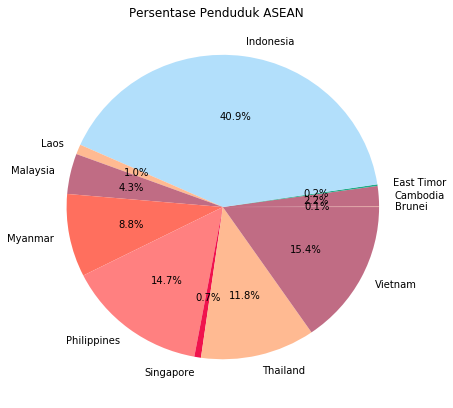

In [7]:
value = dfAsean.Population
label = dfAsean.Name

# plt.style.use("seaborn-pastel")
fig = plt.figure(figsize=(7,7))
ax1 = plt.pie(value, labels=label,
               autopct='%1.1f%%', 
              colors=['#ffba92', '#c06c84', '#1fab89', '#b2dffb','#ffba92', '#c06c84', '#ff6f5e', '#ff8080', '#f0134d'],
               textprops = {'color':"k"}
             )
plt.suptitle("Persentase Penduduk ASEAN", y=0.9)


In [8]:
%matplotlib inline
x_index = np.arange(len(dfAsean.GNP))
x_index_label = dfAsean.Name

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(13,9))

# fig.set_figheight(7)
# fig.set_figwidth(18)

aseanPlot = ax.bar(x_index, dfAsean.GNP, width=.5,align='center', alpha=0.9, 
                    color=['#40bfc1', '#ffd271', '#ff6f5e', '#f0134d', '#b2dffb', '#ffba92', '#ff8080', '#1fab89', '#c06c84'])
plt.xticks(x_index, x_index_label, rotation='45')

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
#         height = rect.get_height()
#         height = 
#         print(height)
#         print(rect.get_x())
#         print(rect.get_width()/2.)
        
        plt.text(rect.get_x() + rect.get_width()/2., # posisi x
                     (1.01*height),                       # posisi y
                    (int(height)),                   # value
                ha='center', va='bottom') 
autolabel(aseanPlot)
plt.suptitle("Pendapatan Bruto ASEAN", fontsize="20")

plt.show()

SyntaxError: invalid syntax (<ipython-input-8-a880e6b29517>, line 21)

## Persentase Luas Daratan ASEAN

In [ ]:
# dfAsean.info()

value = dfAsean.SurfaceArea
label = dfAsean.Name

# plt.style.use("seaborn-pastel")
fig = plt.figure(figsize=(7,7))
ax1 = plt.pie(value, labels=label,
               autopct='%1.1f%%', 
              colors=['#ffba92', '#c06c84', '#1fab89', '#b2dffb','#ffba92', '#c06c84', '#ff6f5e', '#ff8080', '#f0134d'],
               textprops = {'color':"k"}
             )
plt.suptitle("Persentase Luas Daratan ASEAN", y=0.9)
